# Group 8.

### Classification of Butterfly Species Using CNN.

(Advait Chaudhari, Atharwa Gokhale, Swanand Vaidya, Aditya Kulkarni).

# ***Libraries Used***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from PIL import Image
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import MaxPooling2D,Flatten,Dense,Conv2D,Activation,Dropout
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)
import cv2
import os
import numpy as np
%matplotlib inline
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Pre-Processing***

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(

    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale = 1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [ ]:
bs = 128

# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Butterflies', class_mode='categorical', batch_size = bs, target_size=(180, 180))
# load and iterate test dataset
test_it = datagen.flow_from_directory('/content/drive/MyDrive/Butterflies 2', class_mode='categorical', batch_size = bs, target_size=(180, 180))

Found 4221 images belonging to 5 classes.
Found 1845 images belonging to 5 classes.


# ***Model Building***

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(5,activation = "softmax")   #Adding the Output Layer
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 128)      

In [ ]:
# implementing a callback function to terminate training once training reaches 98% accuracy for validation data

validation_accuracy = 0.98

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_accuracy") >= validation_accuracy):
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training=True

callbacks = myCallback()

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_it, epochs=50, validation_data=test_it, verbose=2)

filepath = r"/content/drive/MyDrive/NewButterflies"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

model.save("Newhistory.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33/33 - 196s - loss: 1.7676 - accuracy: 0.2964 - val_loss: 1.5936 - val_accuracy: 0.1680
Epoch 2/50
33/33 - 193s - loss: 1.5450 - accuracy: 0.3146 - val_loss: 1.5567 - val_accuracy: 0.3138
Epoch 3/50
33/33 - 192s - loss: 1.4818 - accuracy: 0.3982 - val_loss: 1.2985 - val_accuracy: 0.4119
Epoch 4/50
33/33 - 191s - loss: 1.2940 - accuracy: 0.4558 - val_loss: 1.2178 - val_accuracy: 0.4423
Epoch 5/50
33/33 - 192s - loss: 1.1410 - accuracy: 0.5124 - val_loss: 0.9812 - val_accuracy: 0.5350
Epoch 6/50
33/33 - 192s - loss: 1.0330 - accuracy: 0.5551 - val_loss: 0.8947 - val_accuracy: 0.5734
Epoch 7/50
33/33 - 192s - loss: 0.8510 - accuracy: 0.6112 - val_loss: 0.8320 - val_accuracy: 0.6130
Epoch 8/50
33/33 - 191s - loss: 0.9240 - accuracy: 0.5975 - val_loss: 0.8666 - val_accuracy: 0.5951
Epoch 9/50
33/33 - 192s - loss: 0.7505 - accuracy: 0.6513 - val_loss: 0.8881 - val_accuracy: 0.5724
Epoch 10/50
33/33 - 191s - loss: 0.7450 - accuracy: 0.6555 - val_loss: 0.9747 - val_accuracy: 0.5355
Epoch 11/5

In [ ]:
# loading saved model for verification. 
# loading using two methods. One is using .h5 file and loading using file path. 

# loading using .h5 file
new_med_model = tf.keras.models.load_model(
    "Newhistory.h5",
    custom_objects=None,
    compile=True
)

In [ ]:
new_med_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 128)      

## ***Result***

In [ ]:
loss,acc = new_med_model.evaluate(test_it, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

15/15 - 35s - loss: 0.3064 - accuracy: 0.8824
Restored model, accuracy: 88.24%


# ***Epoch Vs Loss Graph***

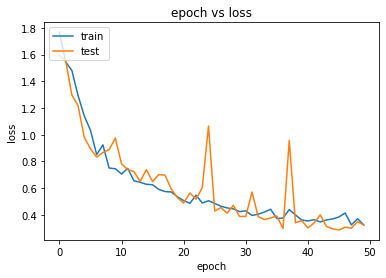

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('epoch vs loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ***Epoch Vs Accuracy Graph***

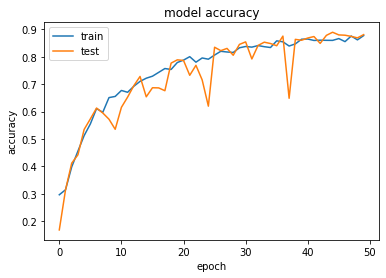

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

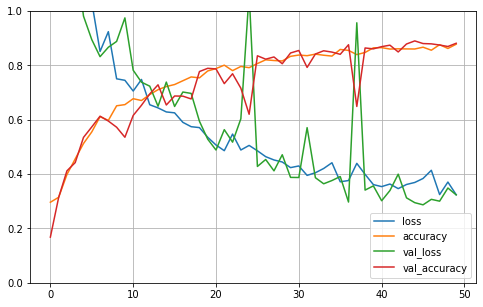

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [ ]:
tf.compat.v1.get_default_graph()

# ***Model Deployment***

In [ ]:
# Load libraries
import flask
import pandas as pd
import tensorflow as tf
import keras
from keras.models import load_model

# instantiate flask 
app = flask.Flask(__name__)

# we need to redefine our metric function in order 
# to use it when loading the model 
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(tf.local_variables_initializer())
    return auc

# load the model, and pass in the custom metric function
global graph
graph = tf.compat.v1.get_default_graph()
model = load_model('Newhistory.h5', custom_objects={'auc': auc})

# define a predict function as an endpoint 
@app.route("/predict", methods=["GET","POST"])
def predict():
    data = {"success": False}

    params = flask.request.json
    if (params == None):
        params = flask.request.args

    # if parameters are found, return a prediction
    if (params != None):
        x=pd.DataFrame.from_dict(params, orient='Newhistory').transpose()
        with graph.as_default():
            data["prediction"] = str(model.predict(x)[0][0])
            data["success"] = True

    # return a response in json format 
    return flask.jsonify(data)    

# start the flask app, allow remote connections 
app.run(host='0.0.0.0')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
